In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("household_power_consumption.csv", na_values="?")
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1/1/2007,0:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0
1,1/1/2007,0:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0
2,1/1/2007,0:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0
3,1/1/2007,0:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0
4,1/1/2007,0:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
525595,31/12/2007,23:55:00,1.746,0.204,242.41,7.2,0.0,0.0,NaN
525596,31/12/2007,23:56:00,1.732,0.210,242.42,7.2,0.0,0.0,NaN
525597,31/12/2007,23:57:00,1.732,0.210,242.50,7.2,0.0,0.0,NaN
525598,31/12/2007,23:58:00,1.684,0.144,242.18,7.0,0.0,0.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   525600 non-null  object 
 1   Time                   525600 non-null  object 
 2   Global_active_power    521669 non-null  float64
 3   Global_reactive_power  521669 non-null  float64
 4   Voltage                521669 non-null  float64
 5   Global_intensity       521669 non-null  float64
 6   Sub_metering_1         521669 non-null  float64
 7   Sub_metering_2         521669 non-null  float64
 8   Sub_metering_3         521669 non-null  float64
dtypes: float64(7), object(2)
memory usage: 36.1+ MB


In [4]:
print(df.describe())

       Global_active_power  Global_reactive_power        Voltage  \
count        521669.000000          521669.000000  521669.000000   
mean              1.117008               0.117365     239.383892   
std               1.162026               0.108296       3.558536   
min               0.082000               0.000000     223.490000   
25%               0.278000               0.000000     236.940000   
50%               0.504000               0.100000     239.740000   
75%               1.548000               0.186000     241.840000   
max              10.670000               1.148000     252.140000   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count     521669.000000   521669.000000   521669.000000   521669.000000  
mean           4.764500        1.231716        1.637743        5.794556  
std            4.905745        6.455547        6.731144        8.186540  
min            0.400000        0.000000        0.000000        0.000000  
25%            1.

In [5]:
print("\nSố giá trị thiếu theo cột là")
missing = df.isnull().sum()
print(missing)


Số giá trị thiếu theo cột là
Date                        0
Time                        0
Global_active_power      3931
Global_reactive_power    3931
Voltage                  3931
Global_intensity         3931
Sub_metering_1           3931
Sub_metering_2           3931
Sub_metering_3           3931
dtype: int64


In [6]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1/1/2007,0:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0
1,1/1/2007,0:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0
2,1/1/2007,0:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0
3,1/1/2007,0:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0
4,1/1/2007,0:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
525595,31/12/2007,23:55:00,1.746,0.204,242.41,7.2,0.0,0.0,NaN
525596,31/12/2007,23:56:00,1.732,0.210,242.42,7.2,0.0,0.0,NaN
525597,31/12/2007,23:57:00,1.732,0.210,242.50,7.2,0.0,0.0,NaN
525598,31/12/2007,23:58:00,1.684,0.144,242.18,7.0,0.0,0.0,NaN


In [9]:
def clean_data(df):
    df = df.fillna({'Global_active_power': df['Global_active_power'].median()})
    df = df.fillna({'Global_reactive_power': df['Global_reactive_power'].median()})
    df = df.fillna({'Voltage': df['Voltage'].median()})
    df = df.fillna({'Global_intensity': df['Global_intensity'].median()})
    df = df.fillna({'Sub_metering_1': df['Sub_metering_1'].ffill()})
    df = df.fillna({'Sub_metering_2': df['Sub_metering_2'].ffill()})
    df = df.fillna({'Sub_metering_3': df['Sub_metering_3'].ffill()})
    return df

df_clean = clean_data(df.copy())
df_clean.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1/1/2007,0:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0
1,1/1/2007,0:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0
2,1/1/2007,0:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0
3,1/1/2007,0:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0
4,1/1/2007,0:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0


In [ ]:
duplicates = df_clean.duplicated().sum()
duplicates_rows = df_clean[df_clean.duplicated(keep=False)]

print("Số dòng trùng lặp: ", duplicates)
print("Dòng trùng lặp là: ")
print(duplicates_rows)

Số dòng trùng lặp:  0
Dòng trùng lặp là: 
Empty DataFrame
Columns: [Date, Time, Global_active_power, Global_reactive_power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2, Sub_metering_3]
Index: []


In [11]:
df_final = df_clean.drop_duplicates()
print(df_final.shape)
df_final


(525600, 9)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1/1/2007,0:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0
1,1/1/2007,0:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0
2,1/1/2007,0:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0
3,1/1/2007,0:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0
4,1/1/2007,0:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
525595,31/12/2007,23:55:00,1.746,0.204,242.41,7.2,0.0,0.0,18.0
525596,31/12/2007,23:56:00,1.732,0.210,242.42,7.2,0.0,0.0,18.0
525597,31/12/2007,23:57:00,1.732,0.210,242.50,7.2,0.0,0.0,18.0
525598,31/12/2007,23:58:00,1.684,0.144,242.18,7.0,0.0,0.0,18.0


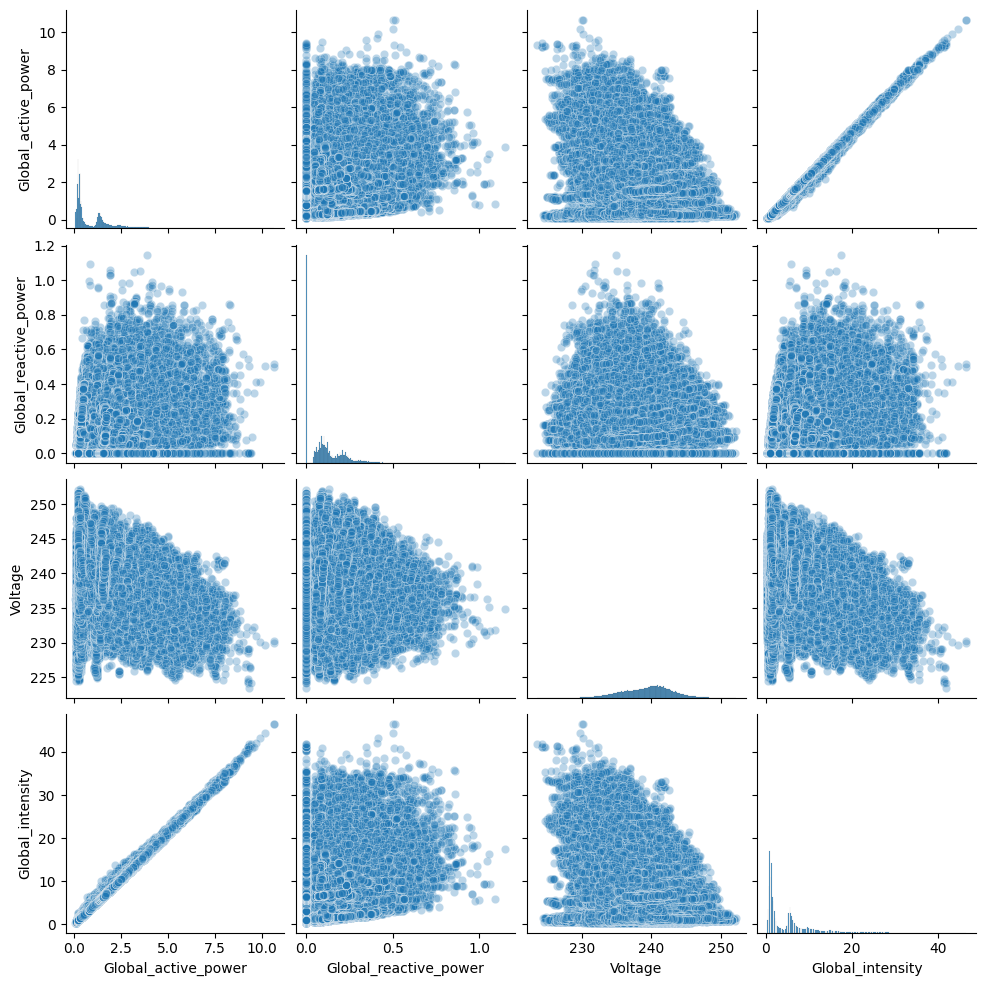

In [17]:
cols = [
    "Global_active_power",
    "Global_reactive_power",
    "Voltage",
    "Global_intensity"
]

import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(
    df[cols],
    diag_kind="hist",
    plot_kws={"alpha": 0.3}
)

plt.show()


In [12]:
df_final["timestamp"] = pd.to_datetime(
    df_final["Date"].astype(str) + " " + df_final["Time"].astype(str),
    format="%d/%m/%Y %H:%M:%S",
    errors="coerce"
)
df_final.drop(columns=["Date", "Time"], inplace=True)

In [13]:
df_final

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,timestamp
0,2.580,0.136,241.97,10.6,0.0,0.0,0.0,2007-01-01 00:00:00
1,2.552,0.100,241.75,10.4,0.0,0.0,0.0,2007-01-01 00:01:00
2,2.550,0.100,241.64,10.4,0.0,0.0,0.0,2007-01-01 00:02:00
3,2.550,0.100,241.71,10.4,0.0,0.0,0.0,2007-01-01 00:03:00
4,2.554,0.100,241.98,10.4,0.0,0.0,0.0,2007-01-01 00:04:00
...,...,...,...,...,...,...,...,...
525595,1.746,0.204,242.41,7.2,0.0,0.0,18.0,2007-12-31 23:55:00
525596,1.732,0.210,242.42,7.2,0.0,0.0,18.0,2007-12-31 23:56:00
525597,1.732,0.210,242.50,7.2,0.0,0.0,18.0,2007-12-31 23:57:00
525598,1.684,0.144,242.18,7.0,0.0,0.0,18.0,2007-12-31 23:58:00


In [14]:
df_final = df_final.sort_values("timestamp")
df_final["label"] = df_final["Global_active_power"].shift(-1)
df_final = df_final.dropna(subset=["label"])


In [15]:
df_final

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,timestamp,label
0,2.580,0.136,241.97,10.6,0.0,0.0,0.0,2007-01-01 00:00:00,2.552
1,2.552,0.100,241.75,10.4,0.0,0.0,0.0,2007-01-01 00:01:00,2.550
2,2.550,0.100,241.64,10.4,0.0,0.0,0.0,2007-01-01 00:02:00,2.550
3,2.550,0.100,241.71,10.4,0.0,0.0,0.0,2007-01-01 00:03:00,2.554
4,2.554,0.100,241.98,10.4,0.0,0.0,0.0,2007-01-01 00:04:00,2.550
...,...,...,...,...,...,...,...,...,...
525594,1.648,0.102,241.56,6.8,0.0,0.0,18.0,2007-12-31 23:54:00,1.746
525595,1.746,0.204,242.41,7.2,0.0,0.0,18.0,2007-12-31 23:55:00,1.732
525596,1.732,0.210,242.42,7.2,0.0,0.0,18.0,2007-12-31 23:56:00,1.732
525597,1.732,0.210,242.50,7.2,0.0,0.0,18.0,2007-12-31 23:57:00,1.684


In [16]:
df_final.to_csv("household_power_consumption_cleaned.csv", index=False)

In [20]:
correlation_matrix = df_final.corr()


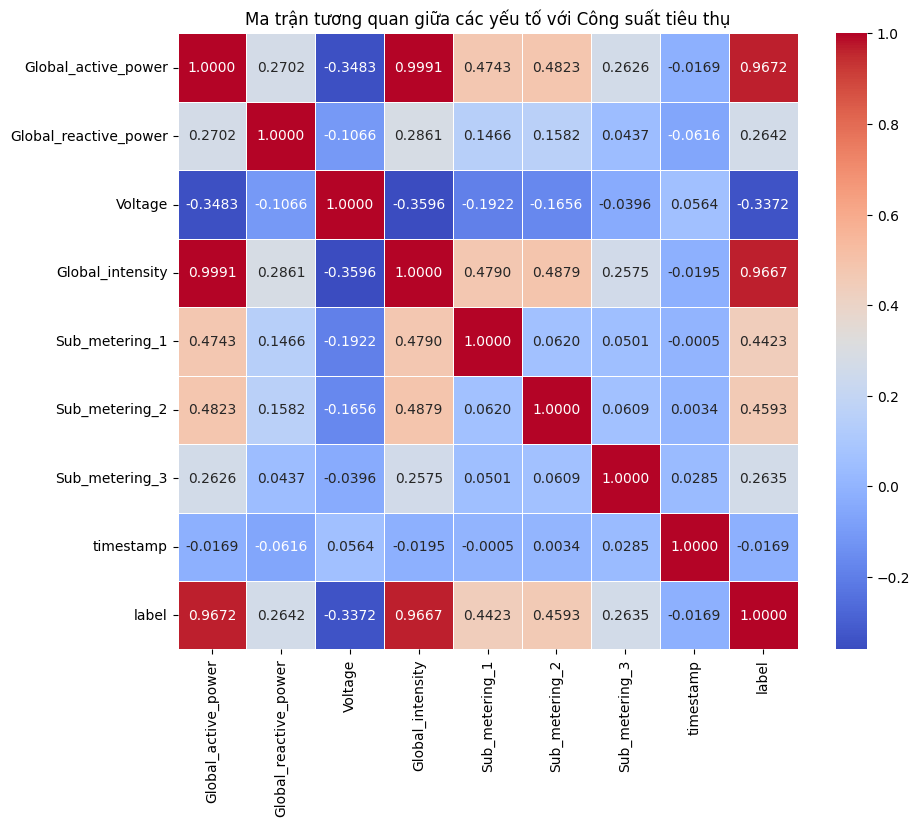

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".4f", cmap='coolwarm', linewidths=.5)
plt.title('Ma trận tương quan giữa các yếu tố với Công suất tiêu thụ')
plt.show()

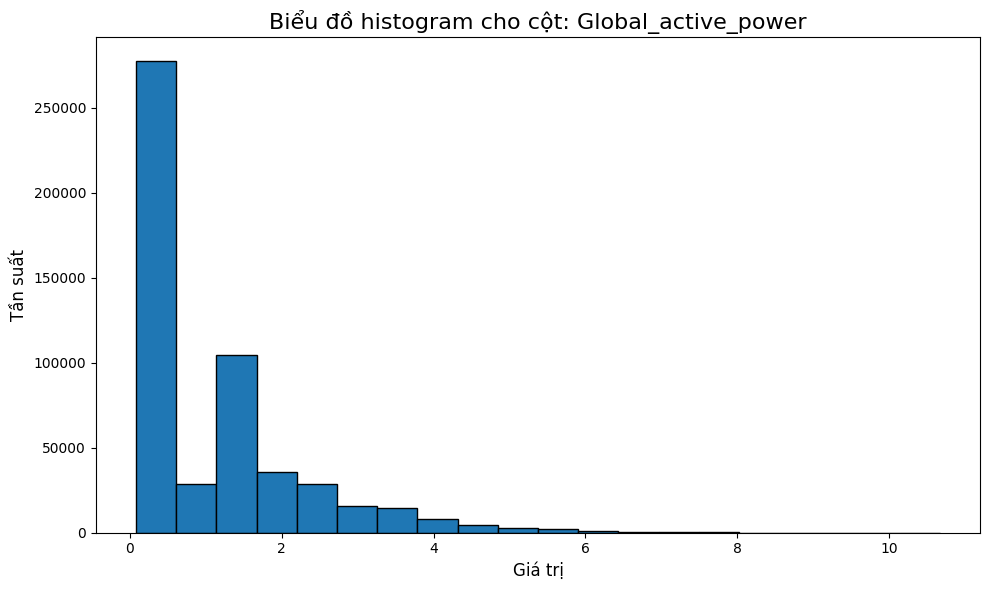

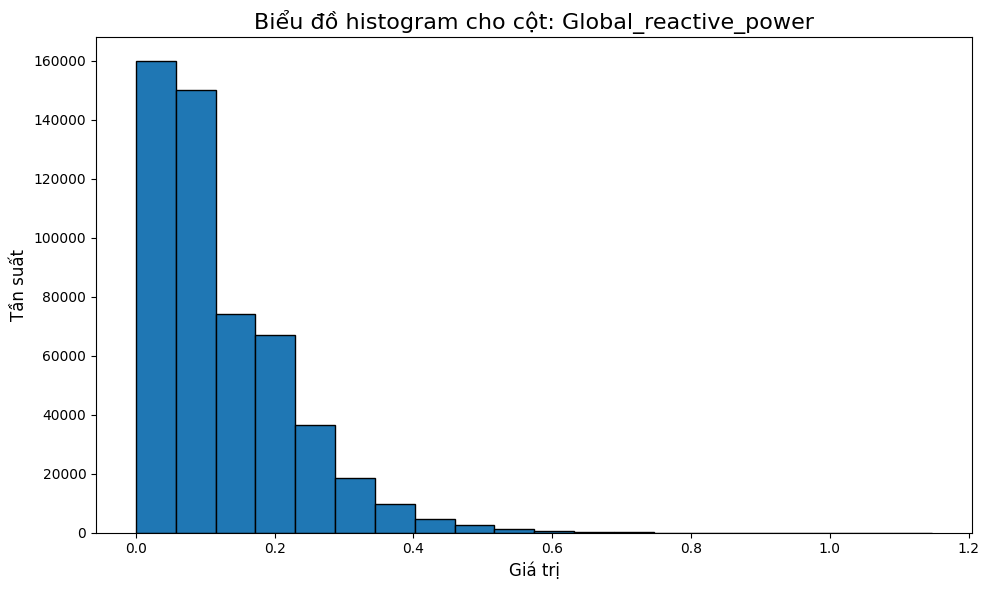

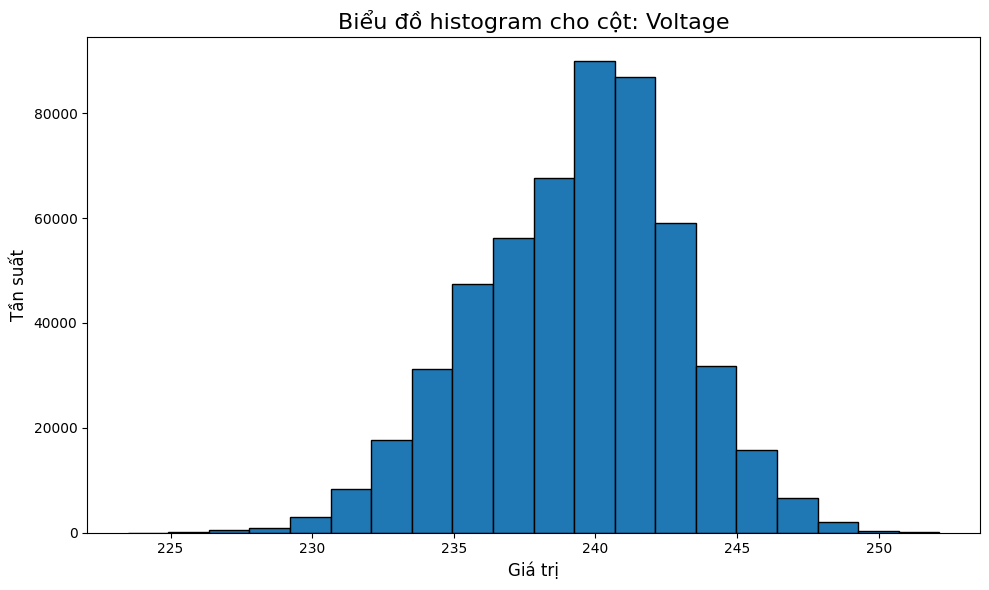

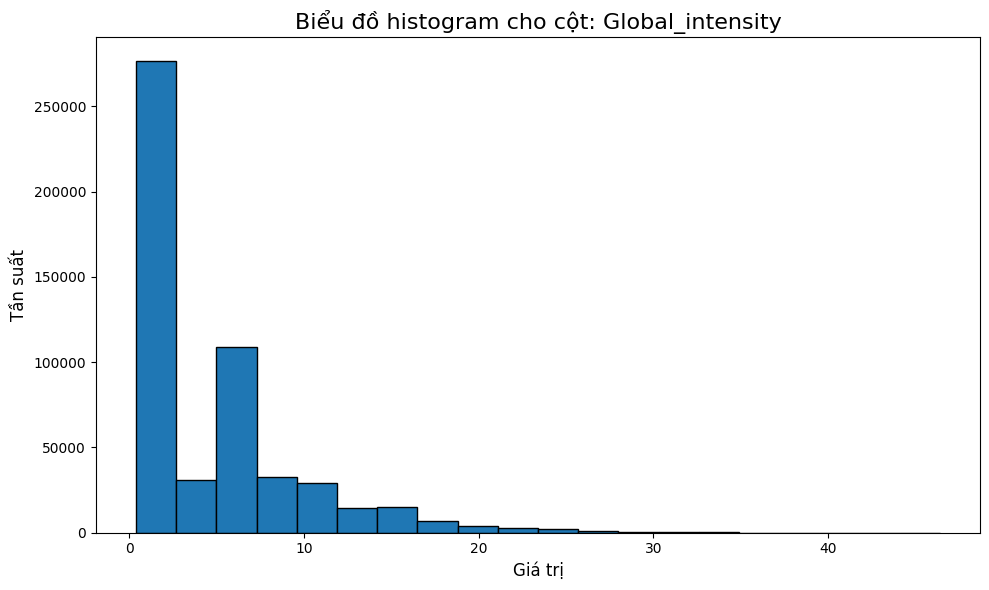

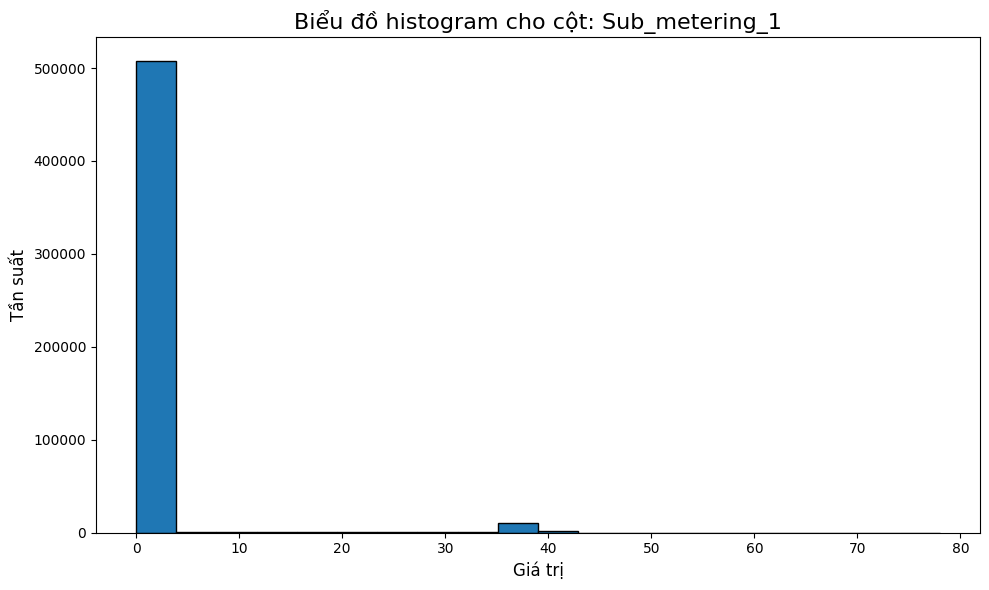

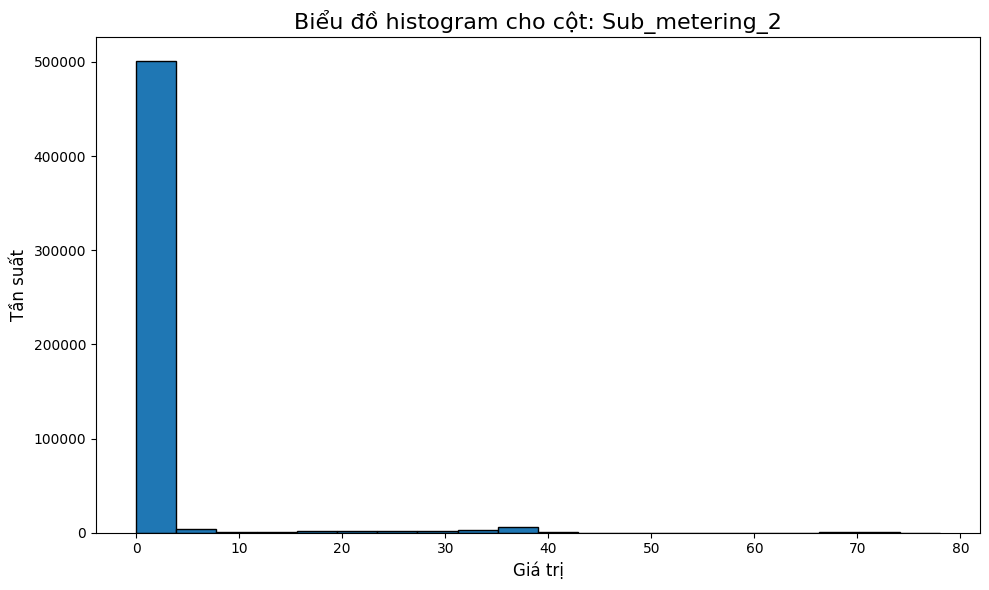

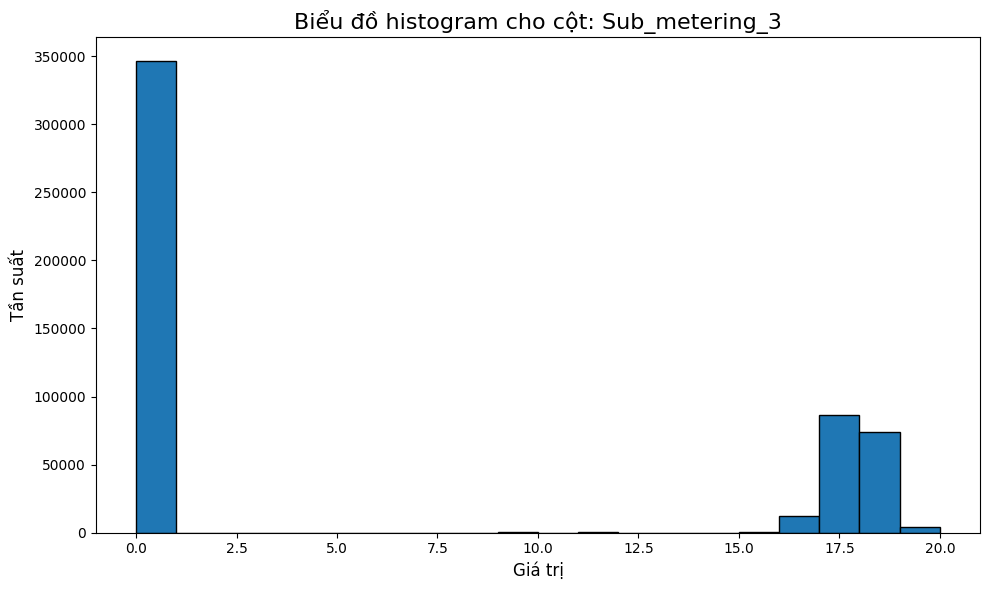

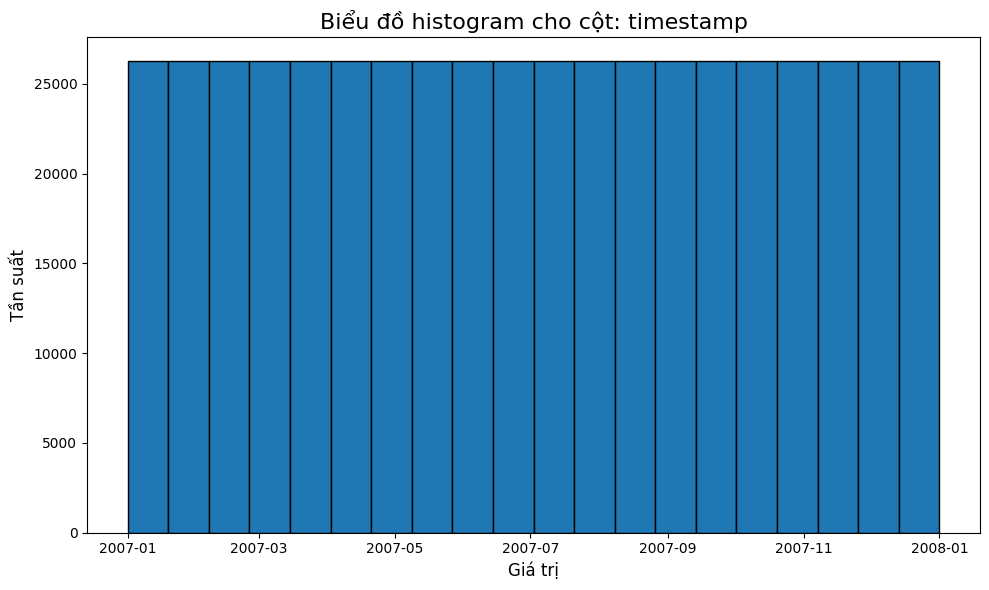

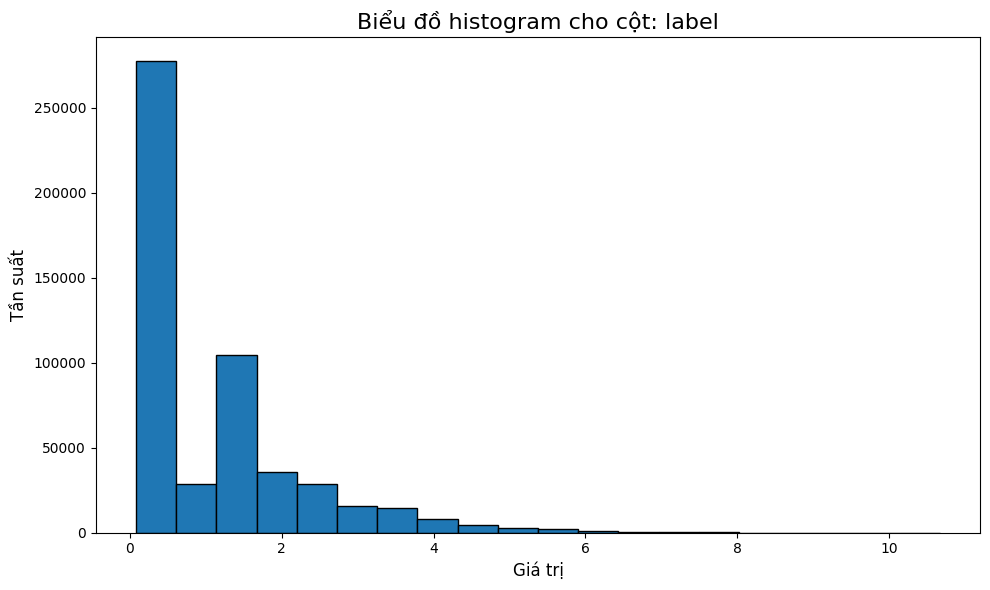

In [19]:
for col in df_final.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df_final[col], bins=20, edgecolor='black')
    plt.title(f"Biểu đồ histogram cho cột: {col}", fontsize=16)
    plt.xlabel('Giá trị', fontsize=12)
    plt.ylabel("Tần suất", fontsize=12)
    plt.tight_layout()
    plt.show()

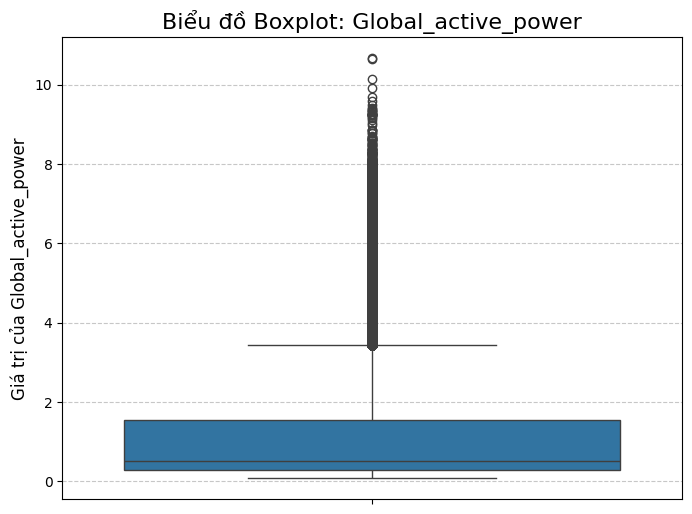

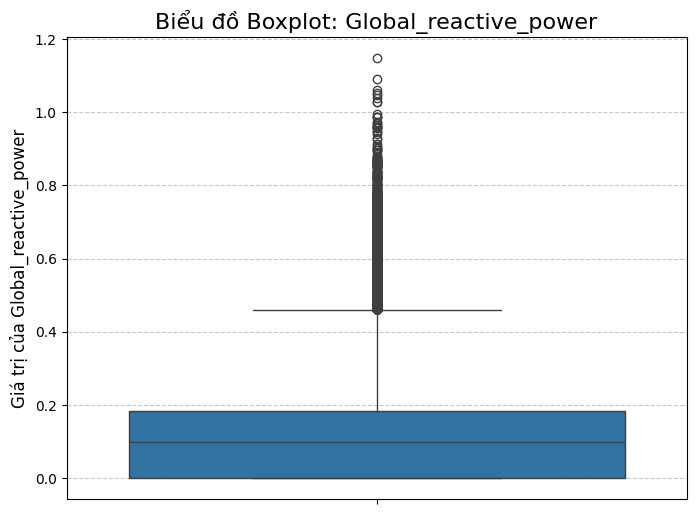

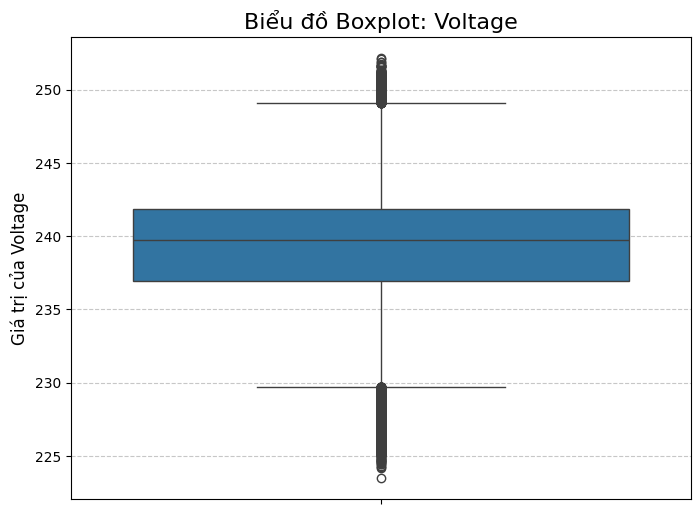

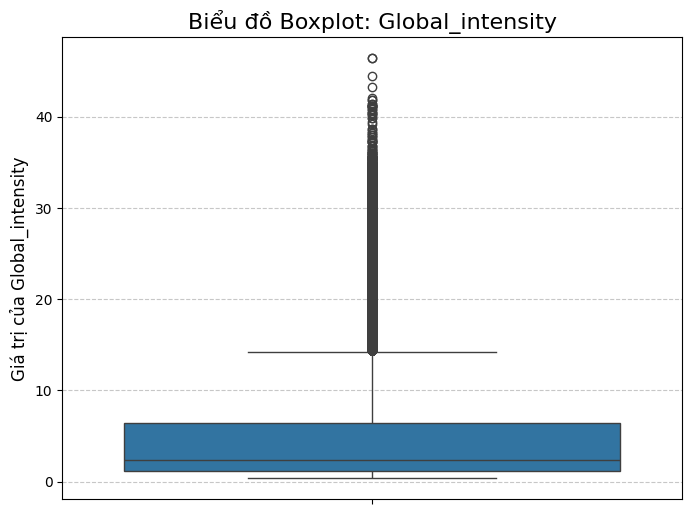

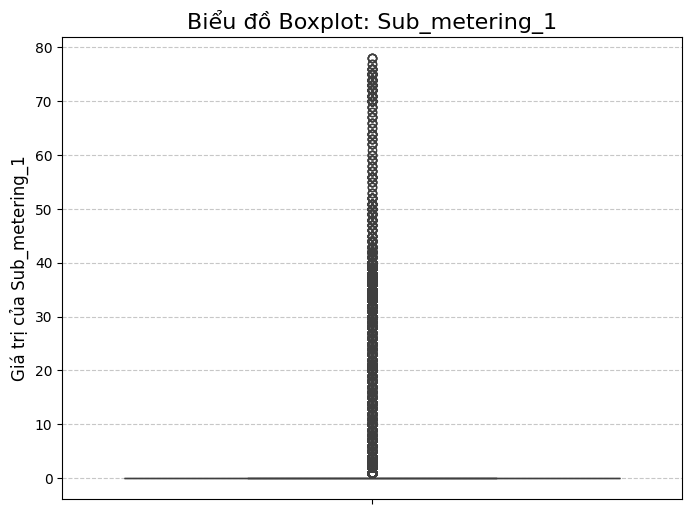

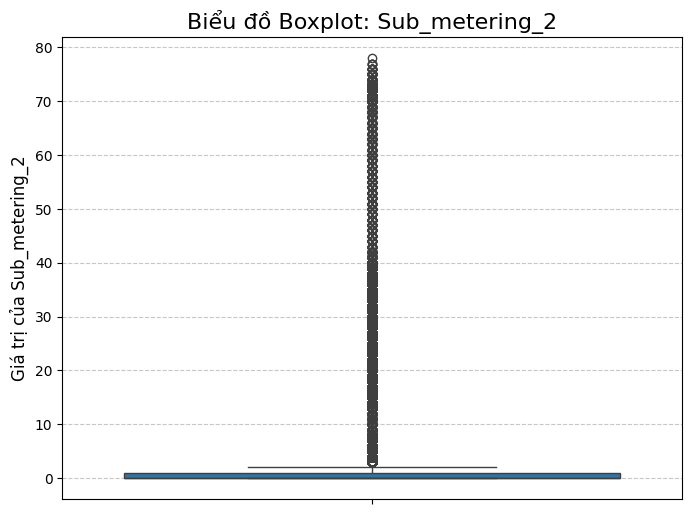

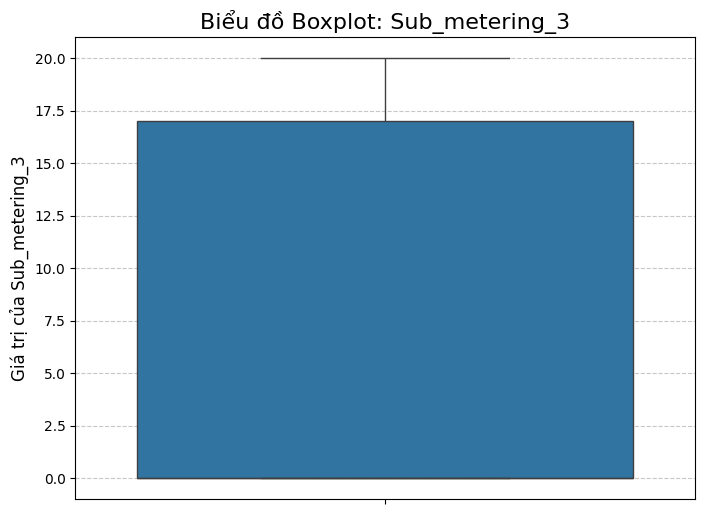

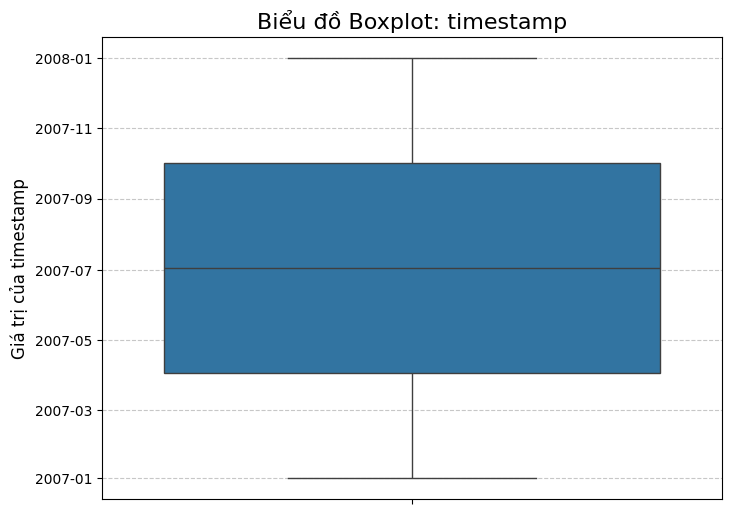

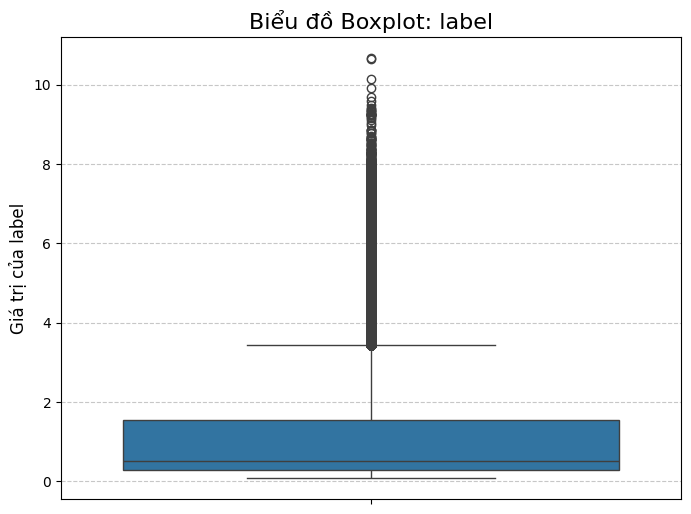

In [18]:
for col in df_final.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_final[col], orient='v')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.title(f"Biểu đồ Boxplot: {col}", fontsize=16)
    plt.ylabel(f"Giá trị của {col}", fontsize=12)
    plt.xlabel("")
    plt.show()